In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install multi_rake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [16]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")
from collections import Counter
nlp.max_length = 1850000
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords = stopwords.words('english')
from textblob import TextBlob
from sklearn.pipeline import make_pipeline
import re
import heapq

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df = pd.read_csv("/content/privacy_data_analysis.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ResponseId  304 non-null    object
 1   Q55         184 non-null    object
 2   Q58         184 non-null    object
 3   Q59         183 non-null    object
 4   Q19         214 non-null    object
 5   Q21         214 non-null    object
 6   Q22         36 non-null     object
 7   Q24         214 non-null    object
 8   Q46         214 non-null    object
 9   Q25         213 non-null    object
 10  Q26         214 non-null    object
 11  Q27         214 non-null    object
 12  Q29         214 non-null    object
 13  Q28         44 non-null     object
dtypes: object(14)
memory usage: 33.5+ KB


## **Pattern Matching**

In [18]:
q28_notna = df.Q28.dropna()

In [19]:
q28_notna.to_frame().to_csv("q28.csv")

In [20]:
all_text = q28_notna.str.cat(sep = ' ')
doc = nlp(all_text)

In [21]:
words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct] 
word_freq = Counter(words) 
word_freq.most_common(30)

[(' ', 12),
 ('question', 11),
 ('student', 11),
 ('device', 10),
 ('answer', 9),
 ('discussion', 8),
 ('word', 6),
 ('game', 5),
 ('like', 5),
 ('record', 5),
 ('maybe', 5),
 ('allow', 4),
 ('professor', 4),
 ('group', 4),
 ('think', 4),
 ('microphone', 4),
 ('datum', 3),
 ('poll', 3),
 ('collaboration', 3),
 ('class', 3),
 ('sure', 3),
 ('base', 3),
 ('provide', 3),
 ('information', 3),
 ('input', 3),
 ('anonymous', 2),
 ('pick', 2),
 ('speak', 2),
 ('score', 2),
 ('choose', 2)]

In [63]:
from spacy.matcher import Matcher 
matcher = Matcher(nlp.vocab)      
pattern = [{'POS':'ADJ'}, {'POS':'NOUN'}] 
# pattern = [{'POS':'ADJ'}, {'POS':'NOUN'}, {"POS": "privacy"}] 
# pattern = [{"LOWER": "privacy"}]
matcher.add('ADJ_PHRASE', [pattern]) 
matches = matcher(doc, as_spans=True) 
phrases = [] 
for span in matches:
    phrases.append(span.text.lower())
    phrase_freq = Counter(phrases)
phrase_freq.most_common(30)

[('multiple choice', 1),
 ('simple search', 1),
 ('main points', 1),
 ('popular word', 1),
 ('other data', 1),
 ('other polls', 1),
 ('popular words', 1),
 ('audio devices', 1),
 ('new idea', 1),
 ('certain students', 1),
 ('more buzz', 1),
 ('higher statistic', 1),
 ('small game', 1),
 ('key words', 1),
 ('interactive polls', 1),
 ('huge breach', 1),
 ('little activity', 1),
 ('visual component', 1),
 ('deliberate input', 1),
 ('clear communication', 1),
 ('various aspects', 1),
 ('ongoing discussion', 1),
 ('complex concepts', 1),
 ('first place', 1),
 ('overall discussions', 1),
 ('overall class', 1),
 ('longer discussions', 1)]

In [26]:
from spacy.matcher import Matcher, PhraseMatcher
matcher = PhraseMatcher(nlp.vocab) 
pattern = [{'POS':'ADJ'}, {'POS':'NOUN'}] 
# pattern = [{'POS':'ADJ'}, {'POS':'NOUN'}, {"POS": "privacy"}] 
# pattern = [{"LOWER": "privacy"}]
privacy_list = ['data', 'concern', 'privacy',]
patterns = [nlp(val) for val in privacy_list]
matcher.add("DATA", patterns) 

matches = matcher(doc, as_spans=True) 
phrases = [] 
for span in matches:
    phrases.append(span.text.lower())
    phrase_freq = Counter(phrases)
phrase_freq.most_common(30)

[('data', 3), ('privacy', 2)]

In [31]:
feel_adj = []
matcher = Matcher(nlp.vocab)
pattern = [{'LOWER' : {'IN' : ['i', 'we']}}, {'OP': '?'}, 
  {'LOWER': {'IN' : ['feel', 'am', "'m", 'are', "'re", "found"]}}, 
  {'OP': '?'}, {'OP': '?'}, {'POS':'ADJ'}]
matcher.add("FeelAdj", [pattern]) 
matches = matcher(doc, as_spans=True) 
for span in matches:
    feel_adj.extend([token.lemma_ for token in span if token.pos_ == 'ADJ'])
Counter(feel_adj)

Counter({'sure': 2, 'visual': 1})

## **Privacy Questions Analysis**

QUESTION 24: I find that device invades my privacy if used **during the class**

In [ ]:
df.Q24.value_counts()

Neutral              79
Agree                56
Disagree             41
Strongly agree       32
Strongly disagree     6
Name: Q24, dtype: int64

QUESTION 46: I find that device invades my privacy if used during **out of the class discussion**

In [ ]:
df.Q46.value_counts()

Agree                85
Strongly agree       66
Neutral              41
Disagree             18
Strongly disagree     4
Name: Q46, dtype: int64

QUESTION 25: Compared to google home and amazon, this device is invasive and intrusive

In [ ]:
df.Q25.value_counts()

Neutral              72
Agree                65
Disagree             51
Strongly agree       19
Strongly disagree     6
Name: Q25, dtype: int64

QUESTION 26: I would rather not have a piece of technology actively recording me in class.

In [ ]:
df.Q26.value_counts()

Neutral              73
Agree                73
Strongly agree       47
Disagree             18
Strongly disagree     3
Name: Q26, dtype: int64

During and out of the discussion comparison

In [ ]:
df.Q25.value_counts()

Neutral              72
Agree                65
Disagree             51
Strongly agree       19
Strongly disagree     6
Name: Q25, dtype: int64

## **Key Phrases**

In [4]:
neutral_df = df[df['Q24'] == 'Neutral']
agree_df = df[df['Q24'] == 'Agree']
strongly_agree_df = df[df['Q24'] == 'Strongly agree']
strongly_disagree_df = df[df['Q24'] == 'Strongly disagree']
disagree_df= df[df['Q24'] == 'Disagree']

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

def remove_stopwords(texts):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]

data_words = list(sent_to_words(disagree['Q19']))
data_words_nostops = remove_stopwords(data_words)

In [ ]:
#count the words
word2count = {}
for row in data_words_nostops:
  for word in row:
    if word not in word2count.keys():
        word2count[word] = 1
    else:
        word2count[word] += 1

In [ ]:
#create a weighted histogram
for key in word2count.keys():
    word2count[key] = word2count[key] / max(word2count.values())

In [ ]:
#extract key phrases
min_keywords = 2
max_keywords = 3

In [ ]:
# Initializes the candidate list to empty
candidates = []
# # Splits the sentence to get a list of lowercase words
# sl = text.lower().split()
for i in disagree['Q19']:
  word = i.lower().split()
  for num_keywords in range(min_keywords, max_keywords + 1):
      # Until the third-last word
      for i in range(0, len(word) - num_keywords):
          # Position i marks the first word of the candidate. Proceeds only if it's not a stopword
          if word[i] not in stopwords:
              candidate = word[i]
              # Initializes j (the pointer to the next word) to 1
              j = 1
              # Initializes the word counter. This counts the non-stopwords words in the candidate
              keyword_counter = 1
              contains_stopword = False
              # Until the word count reaches the maximum number of keywords or the end is reached
              while keyword_counter < num_keywords and i + j < len(word):
                  # Adds the next word to the candidate
                  candidate = candidate + ' ' + word[i + j]
                  # If it's not a stopword, increase the word counter. If it is, turn on the flag
                  if word[i + j] not in stopwords:
                      keyword_counter += 1
                  else:
                      contains_stopword = True
                  # Next position
                  j += 1
              # Adds the candidate to the list only if:
              # 1) it contains at least a stopword (if it doesn't it's already been considered)
              # AND
              # 2) the last word is not a stopword
              # AND
              # 3) the adjoined candidate keyphrase contains exactly the correct number of keywords (to avoid doubles)
              if contains_stopword and candidate.split()[-1] not in stopwords and keyword_counter == num_keywords:
                  candidates.append(candidate)

In [ ]:
#scoring best keyphrases
key2score = {}
for key_phrase in candidates:
  for keyword in key_phrase.split():
    if keyword in word2count.keys():
        if key_phrase not in key2score.keys():
            key2score[key_phrase] = word2count[keyword]
        else:
            key2score[key_phrase] += word2count[keyword]

In [ ]:
for keys, values in key2score.items():
  if values >= 1.0 and values <= 1.9:
    print(keys, values)

transcript and provides data 1.0625
data insights on the types 1.0
nature of a discussion 1.03125
discussion which is also 1.2352941176470589
feedback on the nature of a discussion 1.09375
nature of a discussion which is also 1.2665441176470589
discussion which is also recorded 1.3529411764705883
platform allows for real-time 1.0441176470588236
student data for use 1.1066176470588236
data for use in the classroom 1.1066176470588236
direction in which discussion 1.2941176470588236
include the direction in which discussion 1.4117647058823528
direction in which discussion came 1.411764705882353
discussion came from and the tone/mood. 1.1176470588235294
groups to track collaboration 1.5882352941176472
collaboration quality both during and after collaboration. 1.2857142857142856
gives the discussion 1.2857142857142856
dashboard that gives the discussion 1.4285714285714286
gives the discussion facilitator 1.7142857142857142
like the purpose 1.5714285714285714
purpose of the tool 1.125
provid

## **Emotions**

In [53]:
!pip install -U LeXmo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from LeXmo import LeXmo
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
q28_notna = df.Q28.dropna()

In [57]:
df_combine = pd.DataFrame()
for i in q28_notna:
  sentences = sent_tokenize(i)
  lex_per_sent = [LeXmo.LeXmo(i) for i in sentences]
  df_lx = pd.DataFrame(lex_per_sent)
  df_combine = pd.concat([df_combine, df_lx], axis=0)

In [60]:
df_combine.describe().to_csv("q28_lexmo_stat.csv")

In [66]:
df_combine

,text,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,"{""ImportId"":""QID23_TEXT""}",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,"Visualization, voice interactions",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,No.,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,For anonymous multiple choice questions and vo...,0.142857,0.142857,0.0,0.000000,0.142857,0.142857,0.285714,0.142857,0.142857,0.142857
0,"Simple search + answer for questions, game-lik...",0.000000,0.050000,0.0,0.000000,0.050000,0.050000,0.150000,0.000000,0.050000,0.050000
0,Students can choose when they are recorded and...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,Agenda's for the session.,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,Having students interact with the device rathe...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,You could just have students voluntarily recor...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000
0,"Currently, there exist word-cloud generators w...",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.093750,0.000000,0.000000,0.062500


## **Visualization**

In [5]:
privacy_df = df[['Q24','Q46','Q25','Q26']]

In [6]:
privacy_df = privacy_df.dropna()

Text(0.5, 0.98, 'Outside of the class discussion privacy concern')

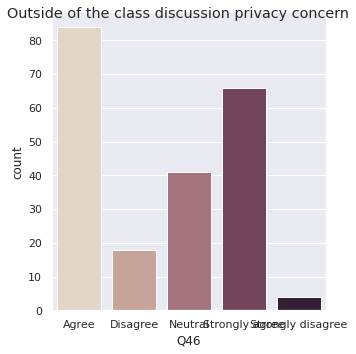

In [24]:
rp = sns.catplot(data=privacy_df, x="Q46", kind="count", palette="ch:.25")
rp.fig.suptitle('Outside of the class discussion privacy concern')

In [27]:
import plotly.express as px
fig = px.bar(privacy_df, x="Q46", color="Q46", title="Outside of the class discussion privacy concern")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [11]:
privacy_df.Q26.value_counts()

Neutral              73
Agree                72
Strongly agree       47
Disagree             18
Strongly disagree     3
Name: Q26, dtype: int64

In [16]:
import plotly.express as px
fig = px.colors.qualitative.swatches()
fig.show()

In [24]:
import plotly.graph_objects as go

categories = ['Agree', 'Disagree', 'Neutral', 'Stronly Agree', 'Strongly Disagree']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=categories,
    y=[65,51,72,19,6],
    name='Device is more invasive than Google Home',
    marker_color='rgb(15,133,84)',
    textposition='auto',
))
fig.add_trace(go.Bar(
    x=categories,
    y=[72,18,73,47,3],
    name="Not willing to be recorded during the classroom",
    marker_color='rgb(115,175,72)',
    textposition='auto',
))

fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.update_layout(
    title="Users considering device invasive than Google Home and choosing not be recorded during the classroom",
    yaxis=dict(
        title='User Responses',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0.60,
        y=0.91,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
)
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [8]:
import plotly.graph_objects as go

categories = ['Agree', 'Disagree', 'Neutral', 'Stronly Agree', 'Strongly Disagree']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=categories,
    y=[55, 41, 79, 32, 6],
    name='In the classroom',
    marker_color='indianred',
    textposition='auto',
))
fig.add_trace(go.Bar(
    x=categories,
    y=[84,18,41,66,4],
    name='Outside the classroom',
    marker_color='lightsalmon',
    textposition='auto',
))

fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.update_layout(
    title='In and out of the classroom discussion privacy concerns.',
    yaxis=dict(
        title='User Responses',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0.78,
        y=0.92,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
)
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

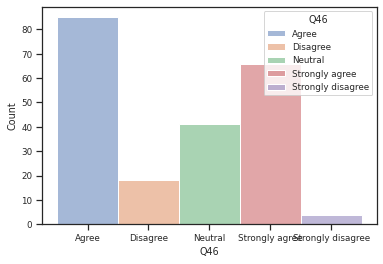

In [ ]:
import seaborn as sns
sns.set(font_scale=0.8)
sns.set_style("ticks")
sns.histplot(x="Q46", hue="Q46", data=df, stat="count")

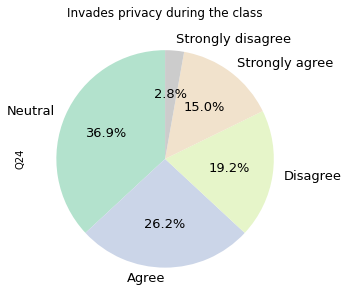

In [ ]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Invades privacy during the class'
)

df.Q24.value_counts().plot.pie(**kwargs)


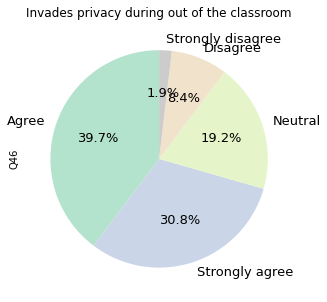

In [ ]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Invades privacy during out of the classroom'
)

df.Q46.value_counts().plot.pie(**kwargs)

## **Correlation Analysis**

**Correlation between the in class and out of the class privacy concerns**

In [ ]:
in_out_class_privacy = pd.crosstab(df['Q24'], df['Q46'])
in_out_class_privacy

Q46,Agree,Disagree,Neutral,Strongly agree,Strongly disagree
Q24,,,,,
Agree,32,3,2,19,0
Disagree,19,15,6,1,0
Neutral,30,0,33,16,0
Strongly agree,2,0,0,30,0
Strongly disagree,2,0,0,0,4


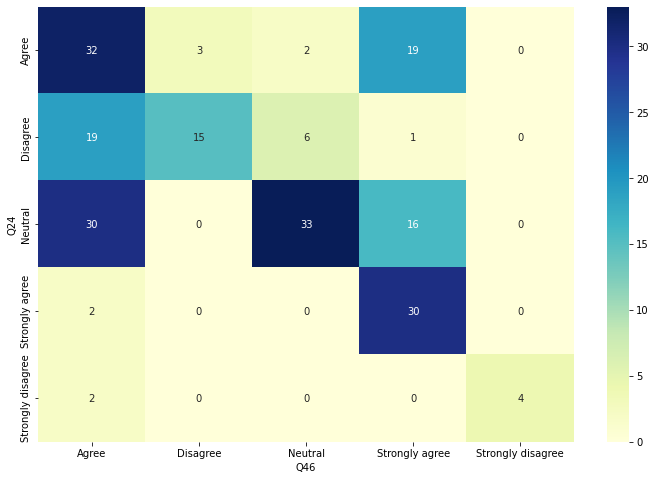

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(in_out_class_privacy, annot=True, cmap="YlGnBu")

**Correlation between user's opinion whether device is invasive than other tools such as google home, alexa and user's being not comfortable when their discussion is recording during**

In [ ]:
device_usage = pd.crosstab(df['Q25'], df['Q26'])
device_usage

Q26,Agree,Disagree,Neutral,Strongly agree,Strongly disagree
Q25,,,,,
Agree,29,2,17,16,1
Disagree,20,10,18,3,0
Neutral,22,2,35,13,0
Strongly agree,0,1,2,15,1
Strongly disagree,1,3,1,0,1


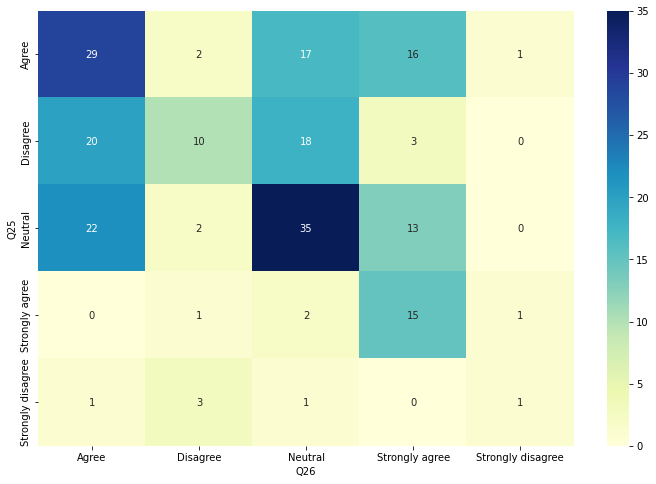

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(device_usage, annot=True, cmap="YlGnBu")

In [ ]:
df2 = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Q21'] = labelencoder.fit_transform(df['Q21'])
df['Q24'] = labelencoder.fit_transform(df['Q24'])
df['Q46'] = labelencoder.fit_transform(df['Q46'])
df['Q25'] = labelencoder.fit_transform(df['Q25'])
df['Q26'] = labelencoder.fit_transform(df['Q26'])

In [ ]:
privacy_data = df[['Q21', 'Q24', 'Q46', 'Q25', 'Q26']]

In [ ]:
matrix = df.corr().round(2)
matrix

,Q21,Q24,Q46,Q25,Q26
Q21,1.00,0.79,0.77,0.76,0.79
Q24,0.79,1.00,0.82,0.83,0.84
Q46,0.77,0.82,1.00,0.76,0.81
Q25,0.76,0.83,0.76,1.00,0.79
Q26,0.79,0.84,0.81,0.79,1.00


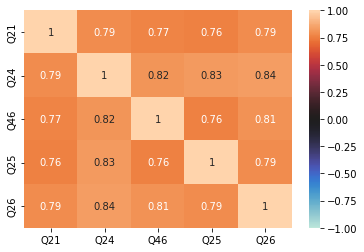

In [ ]:
sns.heatmap(matrix, annot=True, vmax = 1, vmin = -1, center = 0)
plt.show()

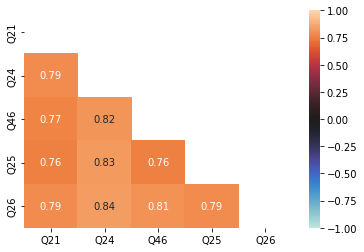

In [ ]:
import numpy as np
mask = np.triu(np.ones_like(matrix, dtype = bool))
sns.heatmap(matrix, annot=True, vmax = 1, vmin = -1, center = 0, mask = mask)
plt.show()

Meeting Jan 3
1. Pick two the most correlated questions and use correlation analysis, also show the correlated number of responses. 


# **Topic Modeling**

In [ ]:
df[df.notna()]

,ResponseId,Q55,Q58,Q59,Q19,Q21,Q22,Q24,Q46,Q25,Q26,Q27,Q29
0,True,False,False,False,True,True,False,True,True,True,True,True,True
1,True,False,False,False,True,True,False,True,True,True,True,True,True
2,True,False,False,False,True,True,False,True,True,True,True,True,True
3,True,False,False,False,True,True,False,True,True,True,True,True,True
4,True,False,False,False,False,True,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,True,False,False,False,False,True,False,True,True,True,True,False,False
300,True,False,False,False,False,True,False,True,True,True,True,False,False
301,True,False,False,False,False,True,False,True,True,True,True,False,False
302,True,False,False,False,False,True,False,True,True,True,True,False,False


In [ ]:
df2 = df[df['Q19'].notna()]

In [32]:
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(analyzer='word',       
                             # min_df=20,                      
                             stop_words='english',             
                             lowercase=True,                  
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=200,  
                            )

data_vectorized = vectorizer.fit_transform(q28_notna)

lda_model_ = LatentDirichletAllocation(n_components=5,
                                      learning_method='online',
                                      random_state=100,       
                                      n_jobs = -1  
                                     )
lda_output = lda_model_.fit_transform(data_vectorized)

print(lda_model_)

LatentDirichletAllocation(learning_method='online', n_components=5, n_jobs=-1,
                          random_state=100)


In [36]:
q28_notna.index

Int64Index([  0,   3,  13,  14,  15,  18,  21,  42,  45,  52,  58,  63,  64,
             68,  72,  73,  76,  87,  88,  89,  94,  99, 105, 107, 123, 129,
            130, 131, 133, 138, 139, 148, 149, 150, 158, 169, 188, 193, 196,
            204, 209, 210, 214, 244],
           dtype='int64')

In [37]:
lda_output = lda_model_.transform(data_vectorized)
topicnames = ["Topic" + str(i) for i in range(5)]
docnames = q28_notna.index
df_document_topic = pd.DataFrame(np.round(lda_output, 5), columns=topicnames, index=docnames)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

In [39]:
# Show top 20 keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model_, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model_, n_words=20)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,group,students,word,devices,input,answer,think,hear,better,game,professor,microphone,answers,conversation,just,like,discussion,response,popular,idea
Topic 1,maybe,class,overall,collaboration,polls,suggestions,interactions,improve,group,interactive,visualization,based,discussions,specific,lecture,voice,allowing,participant,silently,somehting
Topic 2,students,discussion,information,summaries,recording,instructor,lead,choose,time,recorded,questions,access,background,device,talking,provide,record,silently,updated,discussions
Topic 3,interactivity,like,maybe,devices,doing,want,showing,auto,help,probably,does,privacy,key,recommendations,classroom,topics,prompted,able,understanding,discussion
Topic 4,questions,device,answer,professor,sure,answering,team,help,clear,resources,data,concepts,teacher,just,simple,anonymous,alerting,complex,visualization,asking


## **Bigrams & Trigams**

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

data_words = list(sent_to_words(df2['Q19']))

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=30) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=30)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[doc] for doc in texts]

def remove_stopwords(texts):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]
  

In [ ]:
data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)
data_words_trigrams = make_trigrams(data_words_nostops)

In [41]:
c_vec = CountVectorizer(stop_words=stopwords, ngram_range=(2,3))
ngrams = c_vec.fit_transform(q28_notna)
count_values = ngrams.toarray().sum(axis=0)
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [42]:
df_ngram['polarity'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [65]:
df_ngram[df_ngram['frequency'] > 0.00]

,frequency,bigram/trigram,polarity,subjective
0,4,answer questions,0.0,0.000
1,2,microphone enabled,0.0,0.000
2,2,information discussion,0.0,0.000
3,2,hear students,0.0,0.000
4,2,get hear students,0.0,0.000
...,...,...,...,...
650,1,access recording,0.0,0.000
651,1,able boost interactivity,0.5,0.625
652,1,able boost,0.5,0.625
653,1,ability answer questions,0.0,0.000


In [49]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords, ngram_range=(2,3))
lda2 = LatentDirichletAllocation(n_components=5,
                                learning_method='online',
                                random_state=100,       
                                n_jobs = -1)
pipe = make_pipeline(tfidf_vectorizer, lda2)
pipe.fit(q28_notna)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
print_top_words(lda2, tfidf_vectorizer.get_feature_names(), n_top_words=3)

Topic #0: something responds prompted, visualization complex concepts, complex concepts
Topic #1: answer questions, could provide current, current updated information
Topic #2: interactive polls, ability answer questions, ability answer
Topic #3: choose recorded, students choose, students choose recorded
Topic #4: agenda session, answering questions, importid qid23_text



# **Contextualized Topic Modeling**

In [ ]:
!pip install contextualized-topic-models==1.8.2
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessing

all_text = df2.Q19.str.cat(sep = ' ')
doc = nlp(string(all_text))
sp = WhiteSpacePreprocessing(doc, stopwords_language='english') 

In [ ]:
string(all_text)

In [ ]:
preprocessed_documents, unpreprocessed_corpus, vocab, retained_indices = sp.preprocess()